In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [4]:
with open(os.path.join('grid_data_4d', 'dataslot_0', 'all_matches'), 'rb') as fp:
        grid_data_0 = pickle.load(fp)

# Find min and max
for key in list(grid_data_0.keys()):
    if key != 'metadata' and 'phase' not in key:
        grid_data_0[f'{key}_max'] = np.nanmax(np.array(grid_data_0[key]), axis=1)
        grid_data_0[f'{key}_min'] = np.nanmin(np.array(grid_data_0[key]), axis=1)

In [10]:
grid_data_0['metadata']['degen_params'].keys()

dict_keys(['ecc10', 'ecc10sqrd', 'chirp_mass', 'symmetric_mass_ratio', 'chi_eff', 'ecc_gen', 'mass_ratio', 'inverted_mass_ratio', 'total_mass'])

Text(0.5, 0, '$e_{10}$')

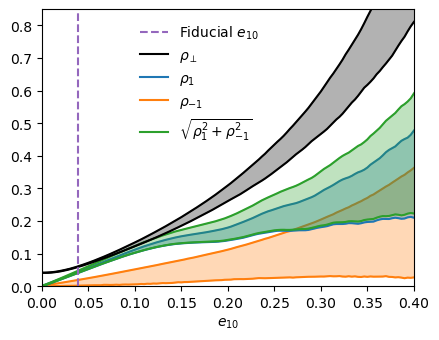

In [12]:
# Plot for each combination
plt.figure(figsize=(0.75*6.4, 0.75*4.8))
e_vals = grid_data_0['metadata']['degen_params']['ecc10']
fid_e = grid_data_0['metadata']['fid_params']['ecc10sqrd']**0.5
plt.axvline(fid_e, ls='dashed', c='C4', zorder=5/5, label='Fiducial $e_{10}$')
high_harm_min = np.sqrt(1-grid_data_0['h0_max']**2)/grid_data_0['h0_max']
high_harm_max = np.sqrt(1-grid_data_0['h0_min']**2)/grid_data_0['h0_min']
plt.plot(e_vals, high_harm_max, c='k', zorder=4/5, label='$\\rho_{\\perp}$')
plt.plot(e_vals, high_harm_min, c='k', zorder=4/5)
plt.fill_between(e_vals, high_harm_min, high_harm_max, color='k', zorder=4/5, alpha=0.3)
plt.plot(e_vals, grid_data_0['h1_h0_max'], c='C0', zorder=2/5, label='$\\rho_1$')
plt.plot(e_vals, grid_data_0['h1_h0_min'], c='C0', zorder=2/5)
plt.fill_between(e_vals, grid_data_0['h1_h0_min'], 
                 grid_data_0['h1_h0_max'], color='C0', zorder=2/5, alpha=0.3)
plt.plot(e_vals, grid_data_0['h-1_h0_max'], c='C1', zorder=1/5, label='$\\rho_{-1}$')
plt.plot(e_vals, grid_data_0['h-1_h0_min'], c='C1', zorder=1/5)
plt.fill_between(e_vals, grid_data_0['h-1_h0_min'], 
                 grid_data_0['h-1_h0_max'], color='C1', zorder=1/5, alpha=0.3)
plt.plot(e_vals, grid_data_0['h1_h-1_h0_max'], c='C2', zorder=3/5, label='$\\sqrt{\\rho_1^2+\\rho_{-1}^2}$')
plt.plot(e_vals, grid_data_0['h1_h-1_h0_min'], c='C2', zorder=3/5)
plt.fill_between(e_vals, grid_data_0['h1_h-1_h0_min'], 
                 grid_data_0['h1_h-1_h0_max'], color='C2', zorder=3/5, alpha=0.3)
plt.legend(frameon=False, loc=(0.25,0.50))
plt.xlim(0,0.4)
plt.ylim(0,0.85)
plt.xlabel('$e_{10}$')